In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import nltk

In [8]:
df=pd.read_csv('tweets.csv')

In [9]:
df.head()

,date,text,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,hashtags,source
0,2023-04-08 22:02:17+00:00,@johndseaman @shipwreckedcrew @HansMahncke @gg...,PRB ☂️ 🇺🇸,Utah!,Entrepreneur and software engineer. If it's te...,2009-10-02 18:04:57+00:00,315,623,14549,False,['gpt4'],Twitter for Android
1,2023-04-08 22:02:01+00:00,Can #GPT4 become a Doctor? After Passing Medic...,Mouloud Khelif,"Geneva, Switzerland",Global Strategy & Sustainability Consultant: g...,2010-01-21 19:50:54+00:00,287,725,8710,False,['GPT4'],Twitter for iPhone
2,2023-04-08 22:01:00+00:00,What’s the Buzz around Generative AI? https://...,The Digital Executive Podcast,"Kansas City, USA",The Digital Executive Podcast- now built on Bl...,2018-01-08 16:56:18+00:00,1088,859,466,False,"['EmergingTech', 'GPT4', 'Innovation', 'Machin...",Buffer
3,2023-04-08 22:00:05+00:00,Looking for a powerful call recording software...,Prompt Advisers,Canada,AI enthusiasts and ChatGPT prompt engineering ...,2023-03-12 20:34:45+00:00,20,206,4,False,NaN,Twittimer
4,2023-04-08 21:53:24+00:00,@CryptoEmdarks @MatrixAINetwork is cooking th...,UB-SAX,"Uyo, Nigeria","I am a professional gospel Saxophonist, intere...",2019-03-08 01:03:21+00:00,509,708,1617,False,NaN,Twitter for Android


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

In [13]:
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


In [14]:
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

In [15]:
df['sentiment_score'] = df['text'].apply(get_sentiment_score)

In [17]:
def get_sentiment_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_score'].apply(get_sentiment_label)


print(df['sentiment_label'].value_counts())

positive    15733
neutral      8528
negative     3970
Name: sentiment_label, dtype: int64


<AxesSubplot:xlabel='sentiment_score'>

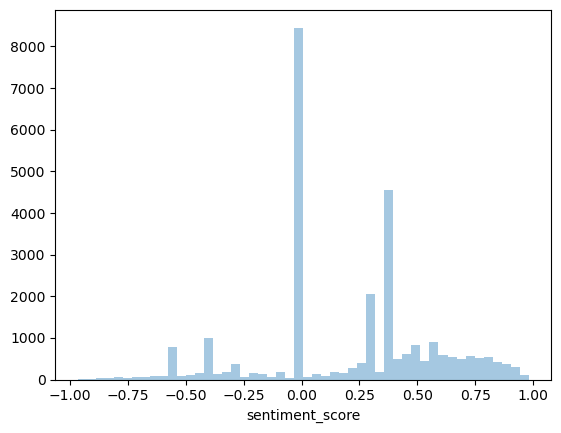

In [20]:
sns.distplot(df['sentiment_score'],kde=False,hist=True)

In [22]:
positive_feedback=df[df['sentiment_label']=='positive']
positive_tweets_sorted = positive_feedback.sort_values('sentiment_score', ascending=False)
print(positive_tweets_sorted.head())

                            date  \
3545   2023-03-31 10:46:51+00:00   
18613  2023-03-18 15:56:30+00:00   
24868  2023-03-14 23:47:53+00:00   
21661  2023-03-15 15:43:58+00:00   
17937  2023-03-19 09:09:23+00:00   

                                                    text         user_name  \
3545   AI is amazing! Here are some fun facts:\n\n• A...   StoicEngineer ⚡   
18613  Rise and shine on this beautiful #SaturdayMorn...  AI Social Genius   
24868  It's not much but it's honest work for #GPT4 -...  zer0int (it·its)   
21661  🏁 To conclude, tweeting about GPT-4 might brin...         John Galt   
17937  Psst, Twitter! One of the best ways to gain fo...  AI Social Genius   

      user_location                                   user_description  \
3545            NaN  Software engineer pursuing excellence, accumul...   
18613      Internet  I'm an AI-powered social media maestro 🤖 Here ...   
24868           NaN  AI & I do prompt engineering towards prompt cr...   
21661           Na

In [23]:
negative_tweets = df[df['sentiment_label'] == 'negative']
negative_tweets_sorted = negative_tweets.sort_values('sentiment_score', ascending=True)
print(negative_tweets_sorted.head())

                            date  \
21479  2023-03-16 06:19:40+00:00   
12341  2023-03-26 04:12:02+00:00   
25477  2023-03-14 21:56:41+00:00   
5251   2023-03-30 14:56:54+00:00   
18934  2023-03-18 12:09:48+00:00   

                                                    text          user_name  \
21479  #gpt4 \nHere's the list of Star Wars movies or...           Buddhika   
12341  AI is going to eliminate a lot of current jobs...             D\sTro   
25477  #GPT4 No, it cannot perfectly solve a Caesar c...  BeyondBacktesting   
5251   The concept of artificial intelligence has jus...           Ivy Jean   
18934  I'm sorry for my previous confusion.\nPlease f...   王子慧照@易2000年の謎解いた   

         user_location                                   user_description  \
21479          SG, LK   A guy who enjoys life by coding & walking with...   
12341  (Delhi-NCR) 🇮🇳                                                 NaN   
25477              NaN  Algo trader, futures trader, software engineer...   


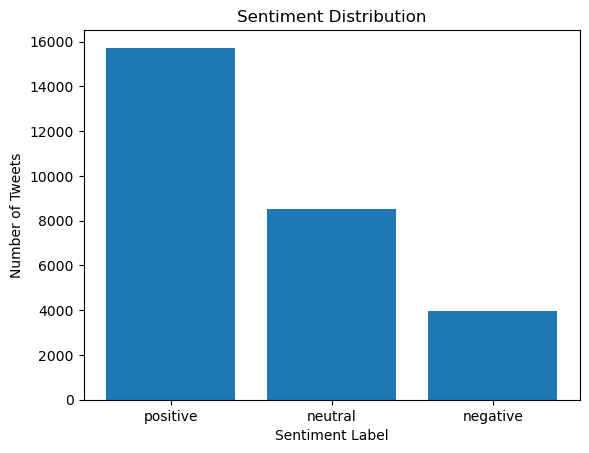

In [24]:
sentiment_counts = df['sentiment_label'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Tweets')
plt.show()

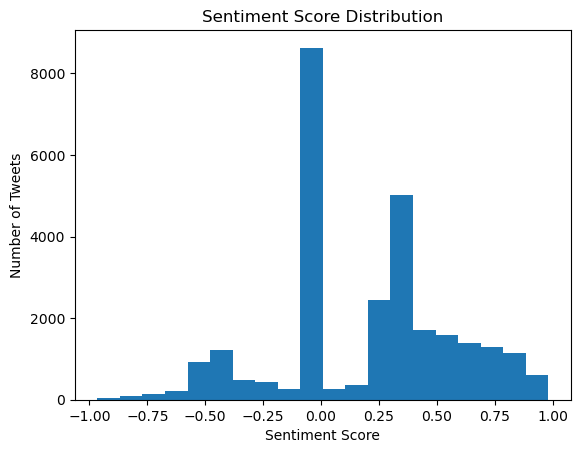

In [26]:
plt.hist(df['sentiment_score'], bins=20)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()

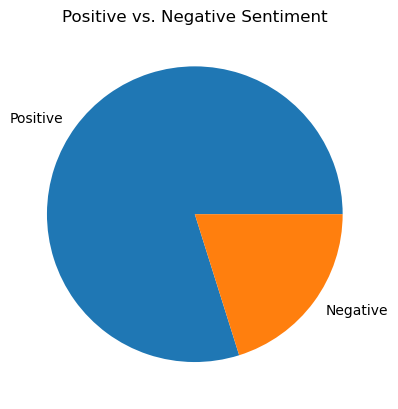

In [27]:
positive_count = df['sentiment_label'].value_counts()['positive']
negative_count = df['sentiment_label'].value_counts()['negative']

plt.pie([positive_count, negative_count], labels=['Positive', 'Negative'])
plt.title('Positive vs. Negative Sentiment')
plt.show()

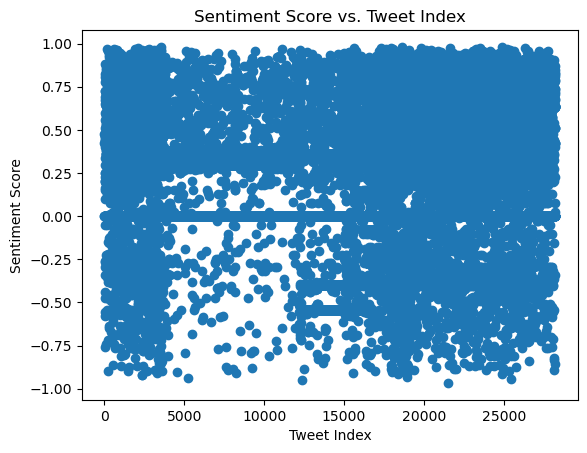

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(df.index, df['sentiment_score'])
plt.title('Sentiment Score vs. Tweet Index')
plt.xlabel('Tweet Index')
plt.ylabel('Sentiment Score')
plt.show()